20-1-2025

In [2]:

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
np.random.seed(42)
def createdata():
    data = {
        'Age': np.random.randint(18,70,size = 20),
        'Salary': np.random.randint(30000,120000,size = 20),
        'Gender': np.random.choice(['Male','Female'],size = 20),
        'Purchased': np.random.choice([0,1],size = 20),
        'City': np.random.choice(['New York','San Francisco','Los Angeles'],size = 20)
    }
    df = pd.DataFrame(data)
    return df
df = createdata()
df.head(10)

,Age,Salary,Gender,Purchased,City
0,56,92955,Female,1,San Francisco
1,69,94925,Male,1,San Francisco
2,46,97969,Male,0,New York
3,32,35311,Male,1,Los Angeles
4,60,113104,Male,0,San Francisco
5,25,83707,Male,1,San Francisco
6,38,115305,Male,0,San Francisco
7,56,58693,Male,1,San Francisco
8,36,101932,Male,0,San Francisco
9,40,55658,Female,0,San Francisco


In [3]:
df.shape

(20, 5)

In [4]:
df.loc[5,'Age'] = np.nan
df.loc[9,'Salary'] = np.nan
df.head(10)

,Age,Salary,Gender,Purchased,City
0,56.0,92955.0,Female,1,San Francisco
1,69.0,94925.0,Male,1,San Francisco
2,46.0,97969.0,Male,0,New York
3,32.0,35311.0,Male,1,Los Angeles
4,60.0,113104.0,Male,0,San Francisco
5,NaN,83707.0,Male,1,San Francisco
6,38.0,115305.0,Male,0,San Francisco
7,56.0,58693.0,Male,1,San Francisco
8,36.0,101932.0,Male,0,San Francisco
9,40.0,NaN,Female,0,San Francisco


In [5]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Salary'].fillna(df['Salary'].median(), inplace=True)
df.head(10)

,Age,Salary,Gender,Purchased,City
0,56.000000,92955.0,Female,1,San Francisco
1,69.000000,94925.0,Male,1,San Francisco
2,46.000000,97969.0,Male,0,New York
3,32.000000,35311.0,Male,1,Los Angeles
4,60.000000,113104.0,Male,0,San Francisco
5,42.105263,83707.0,Male,1,San Francisco
6,38.000000,115305.0,Male,0,San Francisco
7,56.000000,58693.0,Male,1,San Francisco
8,36.000000,101932.0,Male,0,San Francisco
9,40.000000,94925.0,Female,0,San Francisco


In [6]:
df_dropped = df.dropna()
df_dropped.head(10)

,Age,Salary,Gender,Purchased,City
0,56.000000,92955.0,Female,1,San Francisco
1,69.000000,94925.0,Male,1,San Francisco
2,46.000000,97969.0,Male,0,New York
3,32.000000,35311.0,Male,1,Los Angeles
4,60.000000,113104.0,Male,0,San Francisco
5,42.105263,83707.0,Male,1,San Francisco
6,38.000000,115305.0,Male,0,San Francisco
7,56.000000,58693.0,Male,1,San Francisco
8,36.000000,101932.0,Male,0,San Francisco
9,40.000000,94925.0,Female,0,San Francisco


In [7]:
df_dropped.shape

(20, 5)

In [8]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors = 3)
df[['Age','Salary']] = knn_imputer.fit_transform(df[['Age','Salary']])
df.head(10)

,Age,Salary,Gender,Purchased,City
0,56.000000,92955.0,Female,1,San Francisco
1,69.000000,94925.0,Male,1,San Francisco
2,46.000000,97969.0,Male,0,New York
3,32.000000,35311.0,Male,1,Los Angeles
4,60.000000,113104.0,Male,0,San Francisco
5,42.105263,83707.0,Male,1,San Francisco
6,38.000000,115305.0,Male,0,San Francisco
7,56.000000,58693.0,Male,1,San Francisco
8,36.000000,101932.0,Male,0,San Francisco
9,40.000000,94925.0,Female,0,San Francisco


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df['Gender']=label_encoder.fit_transform(df['Gender'])
df.head()


,Age,Salary,Gender,Purchased,City
0,56.0,92955.0,0,1,San Francisco
1,69.0,94925.0,1,1,San Francisco
2,46.0,97969.0,1,0,New York
3,32.0,35311.0,1,1,Los Angeles
4,60.0,113104.0,1,0,San Francisco


Coefficient (slope): 2.7993236574802762
Intercept: 4.142913319458566
Mean Squared Error: 0.6536995137170021
R-squared: 0.8072059636181392


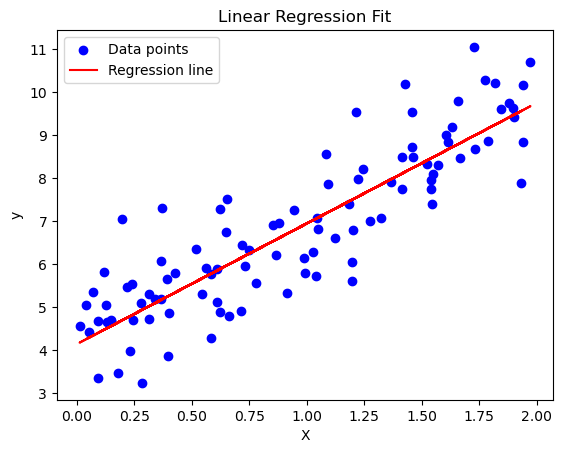

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Generate a synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Independent variable
y = 4 + 3 * X + np.random.randn(100, 1)  # Dependent variable with noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Print model coefficients
print("Coefficient (slope):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

# Visualize the results
plt.scatter(X, y, color="blue", label="Data points")
plt.plot(X, model.predict(X), color="red", label="Regression line")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.show()


In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Generate a synthetic dataset
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Independent variable
y = 4 + 3 * X + np.random.randn(100, 1)  # Dependent variable with noise

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Calculate the coefficient of determination (R²)
r2 = r2_score(y_test, y_pred)
print("Coefficient of Determination (R²):", r2)

# Optional: Manual calculation of R²
ss_total = np.sum((y_test - np.mean(y_test))**2)  # Total sum of squares
ss_residual = np.sum((y_test - y_pred)**2)        # Residual sum of squares
r2_manual = 1 - (ss_residual / ss_total)
print("R² (manual calculation):", r2_manual)


Coefficient of Determination (R²): 0.8072059636181392
R² (manual calculation): 0.8072059636181392
